In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#drop unnecessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

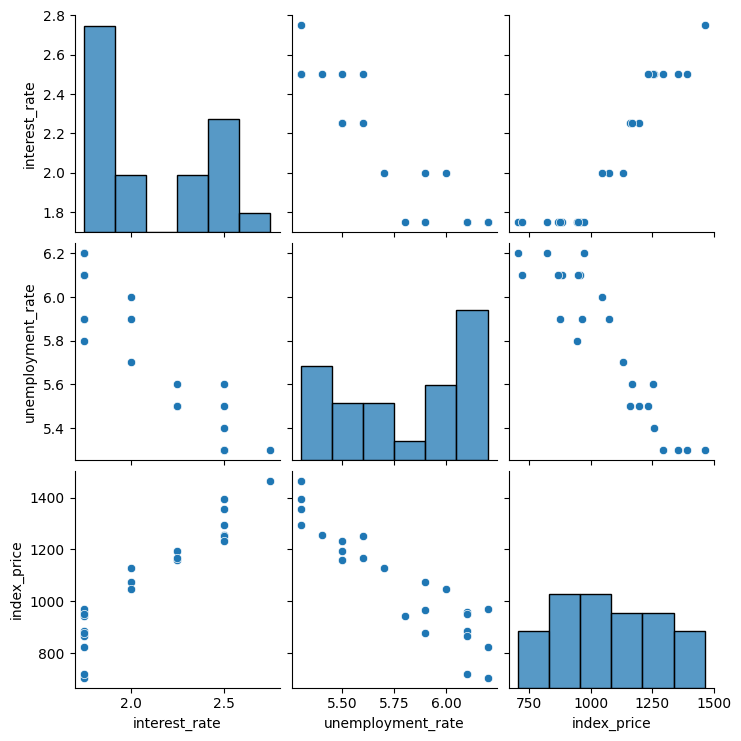

In [6]:
## lets visualize the data
import seaborn as sns
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

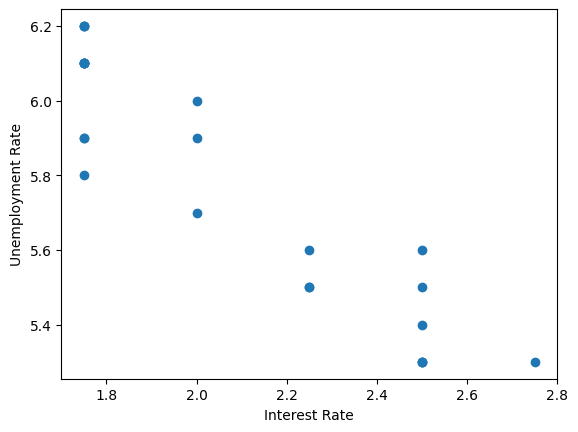

In [8]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [9]:
##dependent and independent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [10]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [13]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

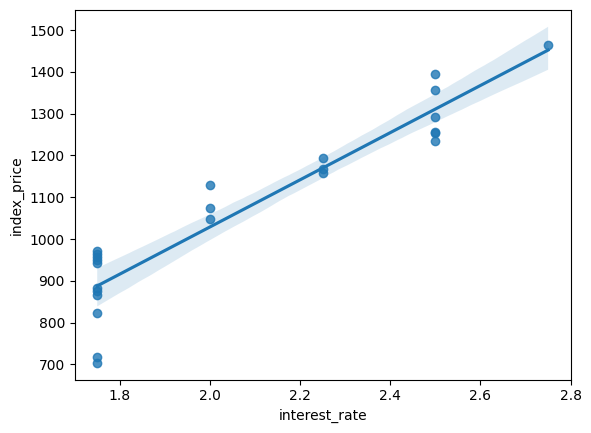

In [14]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

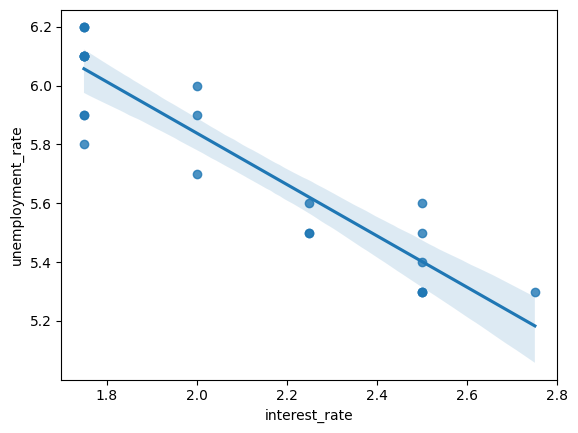

In [15]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

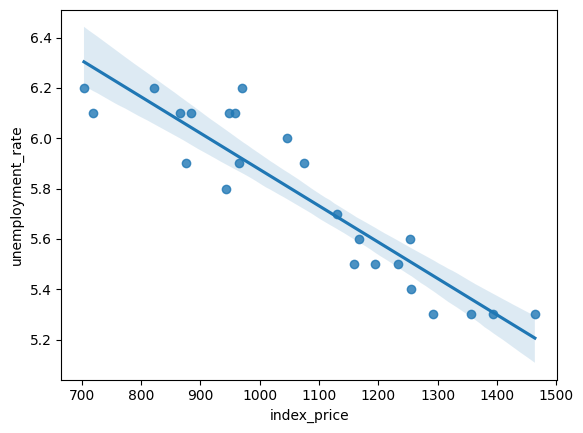

In [16]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [17]:
##standardize the data
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [20]:
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score
validation_scores=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_scores)

np.float64(-5914.828180162386)

In [22]:
##predicting the test set
y_pred=regression.predict(X_test)

In [23]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [24]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)     
rmse=np.sqrt(mse)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 59.935781523235484
MSE: 5793.762887712569
RMSE: 76.11677139574805


In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('R2 Score:',r2)
## adusting r squared
n=len(y_test)
p=X_test.shape[1] 
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R2 Score:', adjusted_r2)

R2 Score: 0.8278978091457145
Adjusted R2 Score: 0.7131630152428576


Text(0.5, 1.0, 'Actual vs Predicted Values')

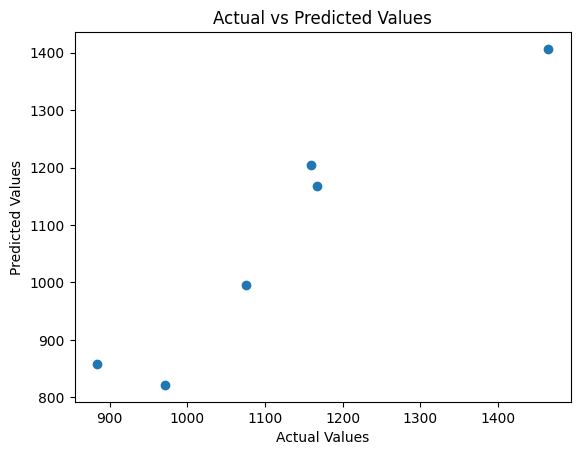

In [26]:
##Asumptions
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')   
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')


Residuals: 8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


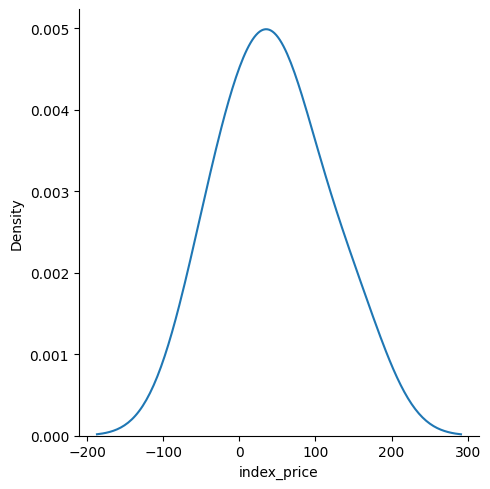

In [27]:
residuals=y_test-y_pred
print('Residuals:', residuals)
sns.displot(residuals, kind='kde')

In [28]:
import statsmodels.api as sm
ols_model=sm.OLS(y_train, X_train).fit()
predictions = ols_model.predict(X_test)
print(predictions)
print(ols_model.summary())

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 15 Jun 2025   Prob (F-statistic):                       0.754
Time:                        00:17:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

d:\Projects\Python\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [29]:
regression.coef_

array([  88.27275507, -116.25716066])

In [ ]:
##pickaling the model
#difination-> pickling is a way to serialize an object in Python, allowing you to save it to a file and load it later.

In [30]:
import pickle
# Save the model to a file
with open('multi_linear_regression_model.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [31]:
#load the pickale
with open('multi_linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [32]:
loaded_model.predict(X_test)
# Check if the loaded model gives the same predictions

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])